In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Handling Missing Values

In [5]:
from sklearn.impute import KNNImputer

impute = KNNImputer(n_neighbors = 5, weights = 'uniform')
data['bmi'] = impute.fit_transform(data[['bmi']])

In [6]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Category and Numeric value seperation

In [7]:
data_cat = [col for col in data.columns if data[col].dtype == "object"]

In [8]:
data_cont = [col for col in data.columns if data[col].dtype != "object"]

Drop the Other row in gender.

In [9]:
data.drop(data[data['gender'] == 'Other'].index, inplace=True)

Expolatory Data Analysis of Category Variables.

Combining children with Never Worked

In [10]:
data.loc[data['work_type']=='children', ['work_type']] = 'Never_worked'

Handling Categorical Values

In [11]:
data = pd.get_dummies(data, columns = ['gender', 'work_type', 'Residence_type', 'smoking_status'], prefix = ['sex', 'work', 'residence', 'smoke'])

In [12]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['ever_married'] = labelEncoder.fit_transform(data['ever_married'])

In [13]:
data

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,67.0,0,1,1,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,1,0,0
1,51676,61.0,0,0,1,202.21,28.893237,1,1,0,0,0,0,1,1,0,0,0,1,0
2,31112,80.0,0,1,1,105.92,32.500000,1,0,1,0,0,1,0,1,0,0,0,1,0
3,60182,49.0,0,0,1,171.23,34.400000,1,1,0,0,0,1,0,0,1,0,0,0,1
4,1665,79.0,1,0,1,174.12,24.000000,1,1,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,83.75,28.893237,0,1,0,0,0,1,0,0,1,0,0,1,0
5106,44873,81.0,0,0,1,125.20,40.000000,0,1,0,0,0,0,1,0,1,0,0,1,0
5107,19723,35.0,0,0,1,82.99,30.600000,0,1,0,0,0,0,1,1,0,0,0,1,0
5108,37544,51.0,0,0,1,166.29,25.600000,0,0,1,0,0,1,0,1,0,0,1,0,0


Expolatory Data Analysis of Continous Variables.

Looking for outliers, outlier indicates values that are different from general values.

/home/raghavi/anaconda3/envs/stroke/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


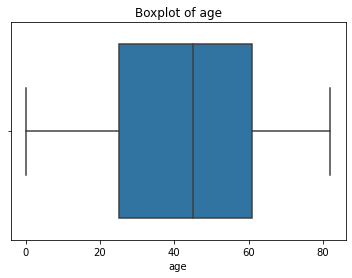

/home/raghavi/anaconda3/envs/stroke/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


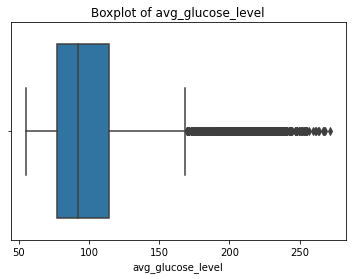

/home/raghavi/anaconda3/envs/stroke/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


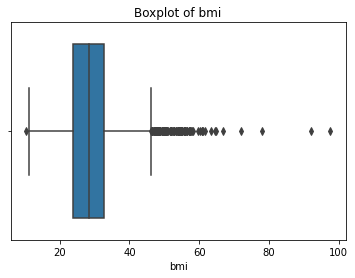

In [14]:
outliars = ['age', 'avg_glucose_level', 'bmi']
for col in outliars:
    plt.title(f'Boxplot of {col}')
    sns.boxplot(data[col])
    plt.show()

In [15]:
Q1 = data[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3 = data[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                  36.00
avg_glucose_level    36.85
bmi                   9.00
dtype: float64


Fixing Outliers

In [16]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

In [17]:
Q1 = data[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3 = data[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                  1.592120
avg_glucose_level    0.813815
bmi                  1.169214
dtype: float64


SMOTE - solving data inconsistency

In [18]:
X = data.drop(['stroke','id'],axis=1)
y = data['stroke']

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X,y)

Features with top importance.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=101)

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)
pred = clf_rf.predict(X_test)
ac = accuracy_score(y_test,pred)
print('Accuracy is: ',ac)
# cm = confusion_matrix(y_test,clf_rf.predict(X_test))
# sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9495884773662552


Feature ranking:
1. feature 0 (0.399671)
2. feature 4 (0.165194)
3. feature 5 (0.151190)
4. feature 3 (0.024718)
5. feature 16 (0.024293)
6. feature 9 (0.022973)
7. feature 10 (0.021951)
8. feature 8 (0.021247)
9. feature 11 (0.021081)
10. feature 14 (0.020920)
11. feature 7 (0.018862)
12. feature 12 (0.017948)
13. feature 6 (0.016772)
14. feature 15 (0.016152)
15. feature 13 (0.015900)
16. feature 1 (0.015442)
17. feature 17 (0.015393)
18. feature 2 (0.010294)


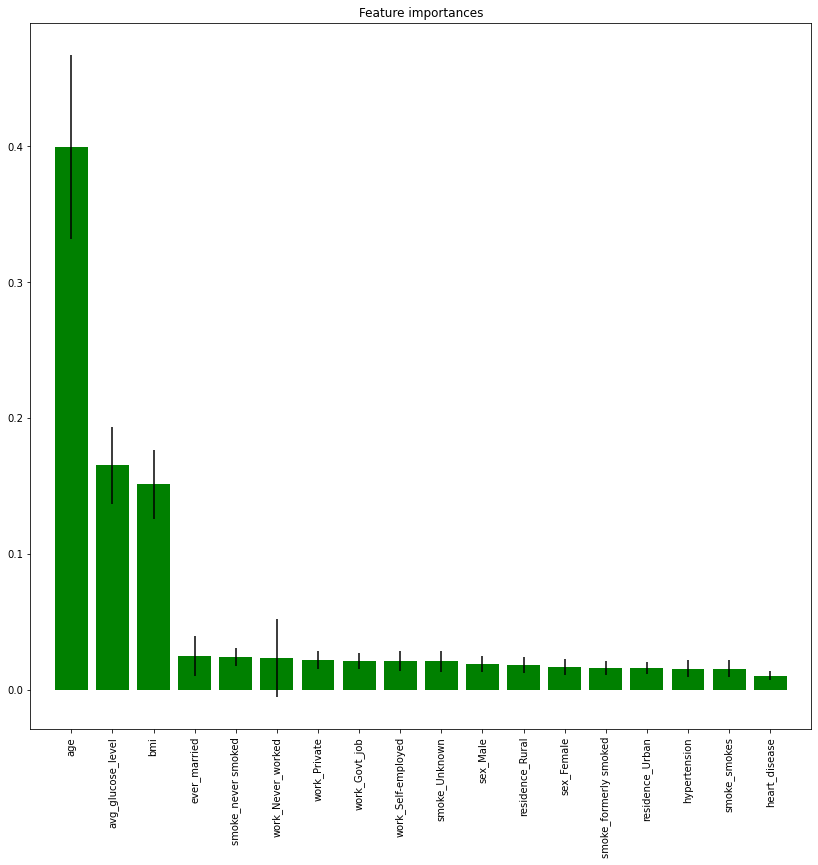

In [21]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [22]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 18
Best features : Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'sex_Female', 'sex_Male', 'work_Govt_job',
       'work_Never_worked', 'work_Private', 'work_Self-employed',
       'residence_Rural', 'residence_Urban', 'smoke_Unknown',
       'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes'],
      dtype='object')


Testing on different Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

In [24]:
def model_selection(X_train, X_test, y_train, y_test, model):
    model = model()
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    f1score = f1_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_test, y_test)  
    filename = str(model)[slice(15)] + ".pkl"
    joblib.dump(model, filename)
    
    print('F1 Score:', f1score)
    print('\n')
    print('Accuracy:', accuracy)
    print('\n')
    print('Report:', report)
    print('\n')
    print('Train Score:',train_score)
    print('\n')
    print('Validation Score:', val_score)
    print('\n')
    print('Is over fitting:', True if train_score>val_score else False)
    print('\n')
    print('Difference between the scores:', train_score*100 - val_score*100)
    print('\n')

Logistic Regression

In [25]:
logistic_regression = model_selection(X_train, X_test, y_train, y_test, LogisticRegression)
logistic_regression

F1 Score: 0.8471933471933472


Accuracy: 0.8487654320987654


Report:               precision    recall  f1-score   support

           0       0.85      0.85      0.85       982
           1       0.85      0.85      0.85       962

    accuracy                           0.85      1944
   macro avg       0.85      0.85      0.85      1944
weighted avg       0.85      0.85      0.85      1944



Train Score: 0.8468364197530864


Validation Score: 0.8487654320987654


Is over fitting: False


Difference between the scores: -0.19290123456789843




Gradient Boosting Classifier

In [26]:
gradient_boosting = model_selection(X_train, X_test, y_train, y_test, GradientBoostingClassifier)
gradient_boosting

F1 Score: 0.8786982248520709


Accuracy: 0.8734567901234568


Report:               precision    recall  f1-score   support

           0       0.92      0.82      0.87       982
           1       0.84      0.93      0.88       962

    accuracy                           0.87      1944
   macro avg       0.88      0.87      0.87      1944
weighted avg       0.88      0.87      0.87      1944



Train Score: 0.8896604938271605


Validation Score: 0.8734567901234568


Is over fitting: True


Difference between the scores: 1.6203703703703667




Decision Tree Classifier

In [27]:
decision_tree = model_selection(X_train, X_test, y_train, y_test, DecisionTreeClassifier)
decision_tree

F1 Score: 0.90927624872579


Accuracy: 0.9084362139917695


Report:               precision    recall  f1-score   support

           0       0.93      0.89      0.91       982
           1       0.89      0.93      0.91       962

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



Train Score: 1.0


Validation Score: 0.9084362139917695


Is over fitting: True


Difference between the scores: 9.156378600823047




Random Forest

In [28]:
random_forest = model_selection(X_train, X_test, y_train, y_test, RandomForestClassifier)
random_forest

F1 Score: 0.9451985922574158


Accuracy: 0.9439300411522634


Report:               precision    recall  f1-score   support

           0       0.98      0.91      0.94       982
           1       0.92      0.98      0.95       962

    accuracy                           0.94      1944
   macro avg       0.95      0.94      0.94      1944
weighted avg       0.95      0.94      0.94      1944



Train Score: 1.0


Validation Score: 0.9439300411522634


Is over fitting: True


Difference between the scores: 5.606995884773653




CatBoost

In [29]:
catboost = model_selection(X_train, X_test, y_train, y_test, CatBoostClassifier)
catboost

Learning rate set to 0.024734
0:	learn: 0.6771222	total: 52.7ms	remaining: 52.6s
1:	learn: 0.6619617	total: 57.2ms	remaining: 28.6s
2:	learn: 0.6468653	total: 61.1ms	remaining: 20.3s
3:	learn: 0.6324490	total: 66.1ms	remaining: 16.5s
4:	learn: 0.6197561	total: 70.3ms	remaining: 14s
5:	learn: 0.6087151	total: 75.6ms	remaining: 12.5s
6:	learn: 0.5942392	total: 79ms	remaining: 11.2s
7:	learn: 0.5821224	total: 82.4ms	remaining: 10.2s
8:	learn: 0.5723680	total: 85.9ms	remaining: 9.46s
9:	learn: 0.5644106	total: 89.4ms	remaining: 8.85s
10:	learn: 0.5548738	total: 93ms	remaining: 8.36s
11:	learn: 0.5441466	total: 96.5ms	remaining: 7.94s
12:	learn: 0.5354216	total: 99.9ms	remaining: 7.59s
13:	learn: 0.5273493	total: 103ms	remaining: 7.28s
14:	learn: 0.5222416	total: 107ms	remaining: 7.01s
15:	learn: 0.5163256	total: 110ms	remaining: 6.77s
16:	learn: 0.5108945	total: 114ms	remaining: 6.58s
17:	learn: 0.5051730	total: 118ms	remaining: 6.42s
18:	learn: 0.5001915	total: 121ms	remaining: 6.26s
19:	

180:	learn: 0.2747012	total: 774ms	remaining: 3.5s
181:	learn: 0.2744898	total: 778ms	remaining: 3.5s
182:	learn: 0.2739590	total: 782ms	remaining: 3.49s
183:	learn: 0.2735827	total: 786ms	remaining: 3.48s
184:	learn: 0.2731841	total: 790ms	remaining: 3.48s
185:	learn: 0.2728048	total: 794ms	remaining: 3.47s
186:	learn: 0.2720853	total: 803ms	remaining: 3.49s
187:	learn: 0.2715094	total: 819ms	remaining: 3.54s
188:	learn: 0.2712311	total: 827ms	remaining: 3.55s
189:	learn: 0.2708181	total: 833ms	remaining: 3.55s
190:	learn: 0.2704312	total: 837ms	remaining: 3.55s
191:	learn: 0.2695025	total: 841ms	remaining: 3.54s
192:	learn: 0.2687282	total: 845ms	remaining: 3.53s
193:	learn: 0.2682690	total: 849ms	remaining: 3.53s
194:	learn: 0.2678752	total: 852ms	remaining: 3.52s
195:	learn: 0.2674326	total: 856ms	remaining: 3.51s
196:	learn: 0.2671178	total: 859ms	remaining: 3.5s
197:	learn: 0.2665015	total: 863ms	remaining: 3.49s
198:	learn: 0.2661026	total: 866ms	remaining: 3.49s
199:	learn: 0.2

389:	learn: 0.1976609	total: 1.56s	remaining: 2.44s
390:	learn: 0.1968953	total: 1.56s	remaining: 2.43s
391:	learn: 0.1965738	total: 1.57s	remaining: 2.43s
392:	learn: 0.1960383	total: 1.57s	remaining: 2.42s
393:	learn: 0.1957513	total: 1.57s	remaining: 2.42s
394:	learn: 0.1955731	total: 1.58s	remaining: 2.42s
395:	learn: 0.1953542	total: 1.58s	remaining: 2.42s
396:	learn: 0.1952347	total: 1.59s	remaining: 2.41s
397:	learn: 0.1948596	total: 1.59s	remaining: 2.41s
398:	learn: 0.1947113	total: 1.59s	remaining: 2.4s
399:	learn: 0.1941862	total: 1.6s	remaining: 2.4s
400:	learn: 0.1939268	total: 1.6s	remaining: 2.4s
401:	learn: 0.1931521	total: 1.61s	remaining: 2.39s
402:	learn: 0.1928000	total: 1.61s	remaining: 2.39s
403:	learn: 0.1924653	total: 1.61s	remaining: 2.38s
404:	learn: 0.1922456	total: 1.62s	remaining: 2.38s
405:	learn: 0.1919194	total: 1.62s	remaining: 2.37s
406:	learn: 0.1915441	total: 1.63s	remaining: 2.37s
407:	learn: 0.1911092	total: 1.63s	remaining: 2.36s
408:	learn: 0.190

550:	learn: 0.1571241	total: 2.14s	remaining: 1.75s
551:	learn: 0.1569364	total: 2.15s	remaining: 1.74s
552:	learn: 0.1567835	total: 2.15s	remaining: 1.74s
553:	learn: 0.1565526	total: 2.15s	remaining: 1.73s
554:	learn: 0.1559576	total: 2.16s	remaining: 1.73s
555:	learn: 0.1558700	total: 2.17s	remaining: 1.73s
556:	learn: 0.1556911	total: 2.17s	remaining: 1.73s
557:	learn: 0.1555691	total: 2.17s	remaining: 1.72s
558:	learn: 0.1551505	total: 2.18s	remaining: 1.72s
559:	learn: 0.1549800	total: 2.18s	remaining: 1.71s
560:	learn: 0.1547351	total: 2.19s	remaining: 1.71s
561:	learn: 0.1545070	total: 2.19s	remaining: 1.71s
562:	learn: 0.1544289	total: 2.19s	remaining: 1.7s
563:	learn: 0.1541867	total: 2.2s	remaining: 1.7s
564:	learn: 0.1540917	total: 2.2s	remaining: 1.69s
565:	learn: 0.1538917	total: 2.2s	remaining: 1.69s
566:	learn: 0.1533474	total: 2.21s	remaining: 1.68s
567:	learn: 0.1528581	total: 2.21s	remaining: 1.68s
568:	learn: 0.1526995	total: 2.21s	remaining: 1.68s
569:	learn: 0.152

712:	learn: 0.1290088	total: 2.73s	remaining: 1.1s
713:	learn: 0.1289242	total: 2.73s	remaining: 1.09s
714:	learn: 0.1285050	total: 2.73s	remaining: 1.09s
715:	learn: 0.1284348	total: 2.74s	remaining: 1.08s
716:	learn: 0.1283579	total: 2.74s	remaining: 1.08s
717:	learn: 0.1282061	total: 2.75s	remaining: 1.08s
718:	learn: 0.1280317	total: 2.75s	remaining: 1.07s
719:	learn: 0.1278722	total: 2.75s	remaining: 1.07s
720:	learn: 0.1278051	total: 2.76s	remaining: 1.07s
721:	learn: 0.1276800	total: 2.76s	remaining: 1.06s
722:	learn: 0.1276254	total: 2.77s	remaining: 1.06s
723:	learn: 0.1275125	total: 2.77s	remaining: 1.05s
724:	learn: 0.1274367	total: 2.77s	remaining: 1.05s
725:	learn: 0.1273450	total: 2.78s	remaining: 1.05s
726:	learn: 0.1272140	total: 2.78s	remaining: 1.04s
727:	learn: 0.1270724	total: 2.78s	remaining: 1.04s
728:	learn: 0.1269718	total: 2.79s	remaining: 1.04s
729:	learn: 0.1267899	total: 2.79s	remaining: 1.03s
730:	learn: 0.1267358	total: 2.79s	remaining: 1.03s
731:	learn: 0

874:	learn: 0.1085539	total: 3.31s	remaining: 473ms
875:	learn: 0.1083604	total: 3.31s	remaining: 469ms
876:	learn: 0.1082980	total: 3.32s	remaining: 465ms
877:	learn: 0.1082043	total: 3.32s	remaining: 462ms
878:	learn: 0.1080294	total: 3.33s	remaining: 458ms
879:	learn: 0.1079316	total: 3.33s	remaining: 454ms
880:	learn: 0.1077487	total: 3.34s	remaining: 451ms
881:	learn: 0.1076736	total: 3.34s	remaining: 447ms
882:	learn: 0.1075865	total: 3.34s	remaining: 443ms
883:	learn: 0.1074487	total: 3.35s	remaining: 439ms
884:	learn: 0.1073685	total: 3.35s	remaining: 435ms
885:	learn: 0.1073246	total: 3.36s	remaining: 432ms
886:	learn: 0.1071722	total: 3.36s	remaining: 428ms
887:	learn: 0.1071382	total: 3.36s	remaining: 424ms
888:	learn: 0.1070815	total: 3.37s	remaining: 420ms
889:	learn: 0.1070042	total: 3.37s	remaining: 417ms
890:	learn: 0.1068827	total: 3.37s	remaining: 413ms
891:	learn: 0.1067789	total: 3.38s	remaining: 409ms
892:	learn: 0.1065057	total: 3.38s	remaining: 405ms
893:	learn: 

XGBoost Classification

In [30]:
xgb = model_selection(X_train, X_test, y_train, y_test, XGBClassifier)
xgb

/home/raghavi/anaconda3/envs/stroke/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score: 0.9645833333333335


Accuracy: 0.9650205761316872


Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97       982
           1       0.97      0.96      0.96       962

    accuracy                           0.97      1944
   macro avg       0.97      0.96      0.97      1944
weighted avg       0.97      0.97      0.97      1944



Train Score: 0.9979423868312757


Validation Score: 0.9650205761316872


Is over fitting: True


Difference between the scores: 3.2921810699588576




LightGBM

In [31]:
lightgbm = model_selection(X_train, X_test, y_train, y_test, LGBMClassifier)
lightgbm

F1 Score: 0.9540051679586563


Accuracy: 0.9542181069958847


Report:               precision    recall  f1-score   support

           0       0.96      0.95      0.95       982
           1       0.95      0.96      0.95       962

    accuracy                           0.95      1944
   macro avg       0.95      0.95      0.95      1944
weighted avg       0.95      0.95      0.95      1944



Train Score: 0.981224279835391


Validation Score: 0.9542181069958847


Is over fitting: True


Difference between the scores: 2.7006172839506206




Final Model Selection

We have selected a model that has high F1score and low difference between train and test score. We do this to avoid overfitting.

We are going to use XGBoost

In [33]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
    
pred = model.predict(X_test)
# unique_elements, counts_elements = np.unique(pred, return_counts=True)
# np.asarray((unique_elements, counts_elements))
# f1score = f1_score(y_test, pred)
# accuracy = accuracy_score(y_test, pred)
# report = classification_report(y_test, pred)
# train_score = model.score(X_train, y_train)
# val_score = model.score(X_test, y_test)

# print('F1 Score:', f1score)
# print('\n')
# print('Accuracy:', accuracy)
# print('\n')
# print('Report:', report)
# print('\n')
# print('Train Score:',train_score)
# print('\n')
# print('Validation Score:', val_score)
# print('\n')
# print('Is over fitting:', True if train_score>val_score else False)
# print('\n')
# print('Difference between the scores:', train_score*100 - val_score*100)
# print('\n')

Learning rate set to 0.024734
0:	learn: 0.6771222	total: 4.82ms	remaining: 4.82s
1:	learn: 0.6619617	total: 9.56ms	remaining: 4.77s
2:	learn: 0.6468653	total: 14.4ms	remaining: 4.79s
3:	learn: 0.6324490	total: 20.7ms	remaining: 5.15s
4:	learn: 0.6197561	total: 25.4ms	remaining: 5.05s
5:	learn: 0.6087151	total: 32ms	remaining: 5.31s
6:	learn: 0.5942392	total: 36ms	remaining: 5.11s
7:	learn: 0.5821224	total: 40.7ms	remaining: 5.05s
8:	learn: 0.5723680	total: 48.6ms	remaining: 5.35s
9:	learn: 0.5644106	total: 55.1ms	remaining: 5.45s
10:	learn: 0.5548738	total: 59.5ms	remaining: 5.35s
11:	learn: 0.5441466	total: 65.8ms	remaining: 5.41s
12:	learn: 0.5354216	total: 71.8ms	remaining: 5.45s
13:	learn: 0.5273493	total: 77.7ms	remaining: 5.47s
14:	learn: 0.5222416	total: 84.1ms	remaining: 5.53s
15:	learn: 0.5163256	total: 95.2ms	remaining: 5.86s
16:	learn: 0.5108945	total: 103ms	remaining: 5.98s
17:	learn: 0.5051730	total: 108ms	remaining: 5.9s
18:	learn: 0.5001915	total: 112ms	remaining: 5.81s


179:	learn: 0.2751553	total: 781ms	remaining: 3.56s
180:	learn: 0.2747012	total: 786ms	remaining: 3.55s
181:	learn: 0.2744898	total: 790ms	remaining: 3.55s
182:	learn: 0.2739590	total: 795ms	remaining: 3.55s
183:	learn: 0.2735827	total: 800ms	remaining: 3.55s
184:	learn: 0.2731841	total: 804ms	remaining: 3.54s
185:	learn: 0.2728048	total: 808ms	remaining: 3.54s
186:	learn: 0.2720853	total: 812ms	remaining: 3.53s
187:	learn: 0.2715094	total: 816ms	remaining: 3.52s
188:	learn: 0.2712311	total: 820ms	remaining: 3.52s
189:	learn: 0.2708181	total: 824ms	remaining: 3.51s
190:	learn: 0.2704312	total: 827ms	remaining: 3.5s
191:	learn: 0.2695025	total: 832ms	remaining: 3.5s
192:	learn: 0.2687282	total: 836ms	remaining: 3.5s
193:	learn: 0.2682690	total: 840ms	remaining: 3.49s
194:	learn: 0.2678752	total: 843ms	remaining: 3.48s
195:	learn: 0.2674326	total: 847ms	remaining: 3.47s
196:	learn: 0.2671178	total: 850ms	remaining: 3.46s
197:	learn: 0.2665015	total: 854ms	remaining: 3.46s
198:	learn: 0.2

380:	learn: 0.2005515	total: 1.56s	remaining: 2.53s
381:	learn: 0.2003151	total: 1.56s	remaining: 2.53s
382:	learn: 0.1998794	total: 1.57s	remaining: 2.52s
383:	learn: 0.1995458	total: 1.57s	remaining: 2.52s
384:	learn: 0.1992109	total: 1.57s	remaining: 2.52s
385:	learn: 0.1989536	total: 1.58s	remaining: 2.51s
386:	learn: 0.1986190	total: 1.58s	remaining: 2.51s
387:	learn: 0.1983749	total: 1.59s	remaining: 2.51s
388:	learn: 0.1979848	total: 1.59s	remaining: 2.5s
389:	learn: 0.1976609	total: 1.6s	remaining: 2.5s
390:	learn: 0.1968953	total: 1.6s	remaining: 2.5s
391:	learn: 0.1965738	total: 1.6s	remaining: 2.49s
392:	learn: 0.1960383	total: 1.61s	remaining: 2.48s
393:	learn: 0.1957513	total: 1.61s	remaining: 2.48s
394:	learn: 0.1955731	total: 1.62s	remaining: 2.48s
395:	learn: 0.1953542	total: 1.62s	remaining: 2.47s
396:	learn: 0.1952347	total: 1.62s	remaining: 2.46s
397:	learn: 0.1948596	total: 1.63s	remaining: 2.46s
398:	learn: 0.1947113	total: 1.63s	remaining: 2.45s
399:	learn: 0.1941

540:	learn: 0.1597311	total: 2.14s	remaining: 1.81s
541:	learn: 0.1591658	total: 2.14s	remaining: 1.81s
542:	learn: 0.1589635	total: 2.15s	remaining: 1.81s
543:	learn: 0.1588492	total: 2.15s	remaining: 1.8s
544:	learn: 0.1586595	total: 2.15s	remaining: 1.8s
545:	learn: 0.1584064	total: 2.16s	remaining: 1.79s
546:	learn: 0.1581758	total: 2.16s	remaining: 1.79s
547:	learn: 0.1580800	total: 2.17s	remaining: 1.79s
548:	learn: 0.1577631	total: 2.17s	remaining: 1.78s
549:	learn: 0.1575761	total: 2.18s	remaining: 1.78s
550:	learn: 0.1571241	total: 2.18s	remaining: 1.78s
551:	learn: 0.1569364	total: 2.19s	remaining: 1.77s
552:	learn: 0.1567835	total: 2.19s	remaining: 1.77s
553:	learn: 0.1565526	total: 2.19s	remaining: 1.76s
554:	learn: 0.1559576	total: 2.2s	remaining: 1.76s
555:	learn: 0.1558700	total: 2.2s	remaining: 1.76s
556:	learn: 0.1556911	total: 2.2s	remaining: 1.75s
557:	learn: 0.1555691	total: 2.21s	remaining: 1.75s
558:	learn: 0.1551505	total: 2.21s	remaining: 1.74s
559:	learn: 0.154

703:	learn: 0.1301612	total: 2.73s	remaining: 1.15s
704:	learn: 0.1300118	total: 2.73s	remaining: 1.14s
705:	learn: 0.1298565	total: 2.73s	remaining: 1.14s
706:	learn: 0.1297482	total: 2.74s	remaining: 1.13s
707:	learn: 0.1295876	total: 2.74s	remaining: 1.13s
708:	learn: 0.1294922	total: 2.75s	remaining: 1.13s
709:	learn: 0.1293543	total: 2.75s	remaining: 1.12s
710:	learn: 0.1292323	total: 2.75s	remaining: 1.12s
711:	learn: 0.1291069	total: 2.76s	remaining: 1.11s
712:	learn: 0.1290088	total: 2.76s	remaining: 1.11s
713:	learn: 0.1289242	total: 2.77s	remaining: 1.11s
714:	learn: 0.1285050	total: 2.77s	remaining: 1.1s
715:	learn: 0.1284348	total: 2.77s	remaining: 1.1s
716:	learn: 0.1283579	total: 2.78s	remaining: 1.1s
717:	learn: 0.1282061	total: 2.78s	remaining: 1.09s
718:	learn: 0.1280317	total: 2.78s	remaining: 1.09s
719:	learn: 0.1278722	total: 2.79s	remaining: 1.08s
720:	learn: 0.1278051	total: 2.79s	remaining: 1.08s
721:	learn: 0.1276800	total: 2.79s	remaining: 1.08s
722:	learn: 0.1

907:	learn: 0.1048511	total: 3.5s	remaining: 355ms
908:	learn: 0.1047329	total: 3.51s	remaining: 351ms
909:	learn: 0.1045904	total: 3.51s	remaining: 348ms
910:	learn: 0.1045571	total: 3.52s	remaining: 344ms
911:	learn: 0.1044827	total: 3.52s	remaining: 340ms
912:	learn: 0.1044042	total: 3.53s	remaining: 336ms
913:	learn: 0.1043277	total: 3.53s	remaining: 332ms
914:	learn: 0.1042688	total: 3.53s	remaining: 328ms
915:	learn: 0.1041791	total: 3.54s	remaining: 324ms
916:	learn: 0.1040564	total: 3.54s	remaining: 321ms
917:	learn: 0.1039906	total: 3.55s	remaining: 317ms
918:	learn: 0.1038673	total: 3.55s	remaining: 313ms
919:	learn: 0.1037400	total: 3.55s	remaining: 309ms
920:	learn: 0.1036974	total: 3.56s	remaining: 305ms
921:	learn: 0.1036442	total: 3.56s	remaining: 301ms
922:	learn: 0.1035238	total: 3.56s	remaining: 297ms
923:	learn: 0.1034468	total: 3.57s	remaining: 294ms
924:	learn: 0.1034064	total: 3.57s	remaining: 290ms
925:	learn: 0.1032824	total: 3.58s	remaining: 286ms
926:	learn: 0

Saving Final Model

In [34]:
model

In [35]:
import joblib

filename = 'finalized_model.pkl'
joblib.dump(model, filename)

['finalized_model.pkl']